### Machine Learning and Statistics - 2021 Project Submission

### GMIT Higher Diploma in Data Analytics

### Submitted by Fiona Lee - 2 January 2022
<br/>

### Overview of the SciPy Stats python library
___________________



##### What is SciPy Stats and what is it used for?

SciPy is an open-source library consisting of a package for statistical functions based on NumPy, Pandas, Matplotlib and SymPy.

The SciPy Stats module (also known as 'statistical functions') is a statistics library and a subpackage of SciPy.  It contains functions such as the probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality.

Scipy Stats is mainly used for probabilistic distributions and statistical operations used to generate descriptive statistical values. SciPy Stats can generate discrete or continuous random numbers and can perform 'T-tests' on the data.  

##### Probability Distributions in SciPy Stats

The **probability density function (pdf)** is a statistical expression that defines the likelihood of an outcome (probability distribution) of a discrete random variable as opposed to a continuous random variable. A discrete variable is a numeric variable with a countable number of values between any two values.  A continuous variable is a numerical variable whose value is set by measuring e.g. measuring time, speed, distance or height or weight.

The **cumulative distribution function (cdf)** calculates the cumulative probability for a given value of x.

##### SciPy Stats consists of three classes:

- ##### rv_continuous

A generic continuous random variable (i.e. the variable can take any value class) meant for subclassing used to construct specific distribution sub-classes and instances for continuous random variables.  

New random variables can be defined by subclassing the rv_continuous class and re-defining the pdf or the cdf methods.

- ##### rv_discrete

A generic discrete random variable class used to construct specific distribution sub-classes and instances for discrete random variables.

- ##### rv_histogram 

Used to generate specific distribution histograms.

### Example hypothesis test using ANOVA
__________________
An ANOVA test is a way to determine whether the null hypothesis should be accepted or rejected by testing if there’s a difference between datasets.

**When to use a one-way ANOVA** <Br><Br/>
One-way ANOVA is used to analyse data collected about one categorical independent variable and one quantitative dependent variable. The independent variable should have at least three different groups or categories.  

ANOVA tells you if the dependent variable changes according to the level of the independent variable. ANOVA identifies differences among the independent variable groups, but does not identify which groups are significant. 
    
The **null hypothesis** of ANOVA is that there is no difference among group means. The **alternate hypothesis** is that at least one group differs significantly from the overall mean of the dependent variable.  If any of the group means is significantly different  from the overall mean ('p-value' < 0.05), then the null hypothesis is rejected.

Note: **'T-test'** is more appropriate when comparing two groups.

#### Introduction to Independent and Dependent Variables
The independent variable in this ANOVA exploration is 'height'.  The dependent variable is 'sex' broken down into 'Male', 'Female' and 'Infant' groups to find out if there is a difference in the height depending on the sex.<Br/>

In [1]:
# Import modules

# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns
import matplotlib.pyplot as plt

# Stats.
import scipy.stats as ss

# Numerical arrays.
import numpy as np

# Collections.
import collections as co

# Norm & specials.
import scipy.special as spec

# For t-tests and ANOVA.
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import f_oneway 
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Change the default figure size
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
# Read in the abalone dataset
df = pd.DataFrame(pd.read_csv("abalone.csv" , names = None , index_col = None))
df.columns=['Sex','Length', 'Diameter', 'Height','Whole_Weight', 'Schucked_Weight', 'Visceral_Weight', 'Shell_Weight','Age']
df

,Sex,Length,Diameter,Height,Whole_Weight,Schucked_Weight,Visceral_Weight,Shell_Weight,Age
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<br>

### Test the assumptions:

#### Assumption 1: Dependent variable

***
The dependent is a variable that is dependent on an independent variable(s).

In [4]:
# Pick 'Height' as the dependent variable.
pd.set_option("display.precision", 3)
dependent = df['Height']
dependent

0       0.090
1       0.135
2       0.125
3       0.080
4       0.095
        ...  
4171    0.165
4172    0.135
4173    0.205
4174    0.150
4175    0.195
Name: Height, Length: 4176, dtype: float64

In [5]:
dependent.describe()

count    4176.000
mean        0.140
std         0.042
min         0.000
25%         0.115
50%         0.140
75%         0.165
max         1.130
Name: Height, dtype: float64

<br>

#### Assumption 2: Independent variable

***
An independent variable consists of two or more categorical, independent groups.

In [6]:
# Pick 'Sex' as the independent categorical variable.
independent = df['Sex']
independent

0       M
1       F
2       M
3       I
4       I
       ..
4171    F
4172    M
4173    M
4174    F
4175    M
Name: Sex, Length: 4176, dtype: object

<br>

#### Assumption 3: Independence of observations
***
There should be no relationship between the observations in each group or between the groups themselves i.e. there must be different participants in each group with no participant being in more than one group. 

It is not possible to test for this assumption but in the case of the abalone dataset the members of the groups are exclusively male, female and infants by design so there is no crossover between the groups.  


<br>

#### Assumption 4: Outliers

***

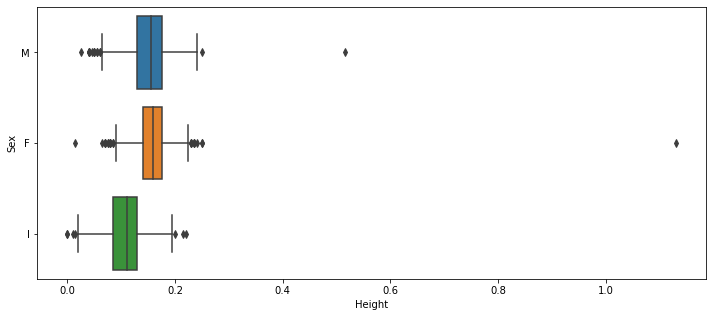

In [7]:
# Identify any possible outliers in the dataset using a boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(x=dependent, y=independent);

In [8]:
# Look at any samples with a height over 0.3mm
df[df.Height > 0.3]

,Sex,Length,Diameter,Height,Whole_Weight,Schucked_Weight,Visceral_Weight,Shell_Weight,Age
1416,M,0.705,0.565,0.515,2.210,1.107,0.486,0.512,10
2050,F,0.455,0.355,1.130,0.594,0.332,0.116,0.134,8


In [9]:
# Look at any samples with a height less than 0.02 mm
df[df.Height < .02]

,Sex,Length,Diameter,Height,Whole_Weight,Schucked_Weight,Visceral_Weight,Shell_Weight,Age
235,I,0.075,0.055,0.010,0.002,0.001,5.000e-04,0.002,1
1173,F,0.635,0.495,0.015,1.157,0.511,3.080e-01,0.288,9
1256,I,0.430,0.340,0.000,0.428,0.206,8.600e-02,0.115,8
2168,I,0.165,0.115,0.015,0.015,0.005,3.000e-03,0.005,4
3995,I,0.315,0.230,0.000,0.134,0.058,2.850e-02,0.350,6


In [10]:
# Remove the obvious outliers with a height over 0.3 & less than .02
df = df[df.Height < 0.3]

In [11]:
df = df[df.Height >= 0.02]

In [12]:
# Refresh the 'dependent variable'
dependent = df['Height']
df.shape

(4169, 9)

<br>

#### Assumption 5: Normality

***

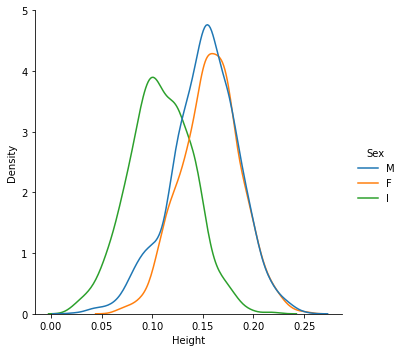

In [13]:
# KDEs of the three sex categories to view the distribution of the variables (height)
sns.displot(x=dependent, hue=independent, kind="kde");

In [14]:
# Extract the female heights.
Height_female = dependent[independent == 'F']
Height_female.describe()

count    1305.000
mean        0.157
std         0.029
min         0.065
25%         0.140
50%         0.160
75%         0.175
max         0.250
Name: Height, dtype: float64

In [15]:
# Extract the male heights.
Height_male = dependent[independent == 'M']
Height_male.describe()

count    1526.000
mean        0.151
std         0.034
min         0.025
25%         0.130
50%         0.155
75%         0.175
max         0.250
Name: Height, dtype: float64

In [16]:
# Extract the infant heights.
Height_infant = dependent[independent == 'I']
Height_infant.describe()

count    1338.000
mean        0.108
std         0.032
min         0.020
25%         0.090
50%         0.110
75%         0.130
max         0.220
Name: Height, dtype: float64

##### Shapiro Wilk Test

The Shapiro-Wilk test first quantifies the similarity between the observed and normal distributions as a single number i.e. the p value' and superimposes a normal curve over the observed distribution of the dataset. It then computes which percentage of our sample overlaps with it.

A perfect normal distribution will have a Shapiro-Wilk value of 1.00. Values less than 1.00 indicate an increasing departure from a perfect normal shape. The null hypothesis of the Shapiro-Wilk test is that the variable is normally distributed. A 'p value' of less than .05 suggests that the distribution is not normal and the null hypothesis is rejected.

In [17]:
# Test the accuracy of the Shapiro Wilks Test on a randomly generated dataset
array = np.random.normal(0.16,0.03,4000)
ss.shapiro(array)

ShapiroResult(statistic=0.9997209906578064, pvalue=0.8940321803092957)

In [18]:
# Run the Shapiro-Wilk test for female heights
ss.shapiro(dependent[independent == 'F'])

ShapiroResult(statistic=0.9959923624992371, pvalue=0.0017051880713552237)

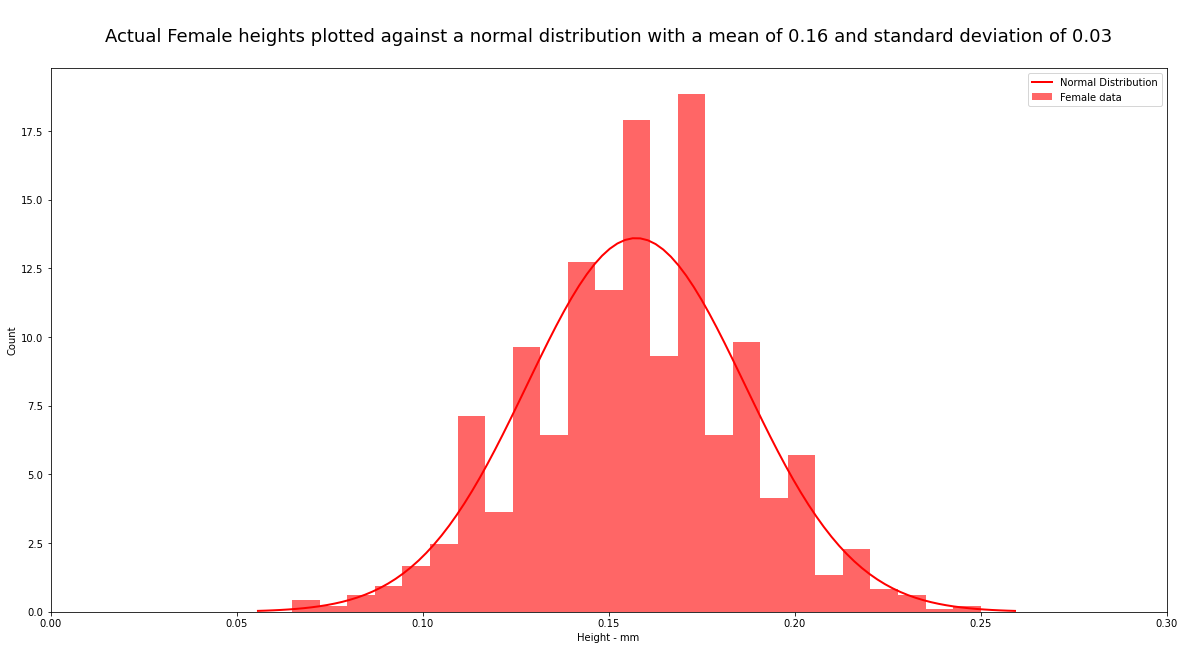

In [19]:
## Visualise the actual female heights versus the normal distribution as a plot

# Make the plots bigger.
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Fit a normal distribution to the data using mean and standard deviation values
mu, std = norm.fit(Height_female) 
  
# Plot the histogram.
plt.hist(Height_female, bins=25, density=True, alpha=0.6, color='r', label = "Female data")
  
# Plot the probability density function (pdf)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.xlim(0.0,0.3)
plt.plot(x, p, 'k', linewidth=2, color = 'r', label = "Normal Distribution")
title = "\nActual Female heights plotted against a normal distribution with a mean of {:.2f} and standard deviation of {:.2f}\n".format(mu, std)
plt.title(title, fontsize=18)
plt.xlabel("Height - mm")
plt.ylabel("Count")
plt.legend()
plt.show();

In [20]:
# Run the Shapiro-Wilk test for male heights
ss.shapiro(dependent[independent == 'M'])

ShapiroResult(statistic=0.9894710779190063, pvalue=4.808848874660043e-09)

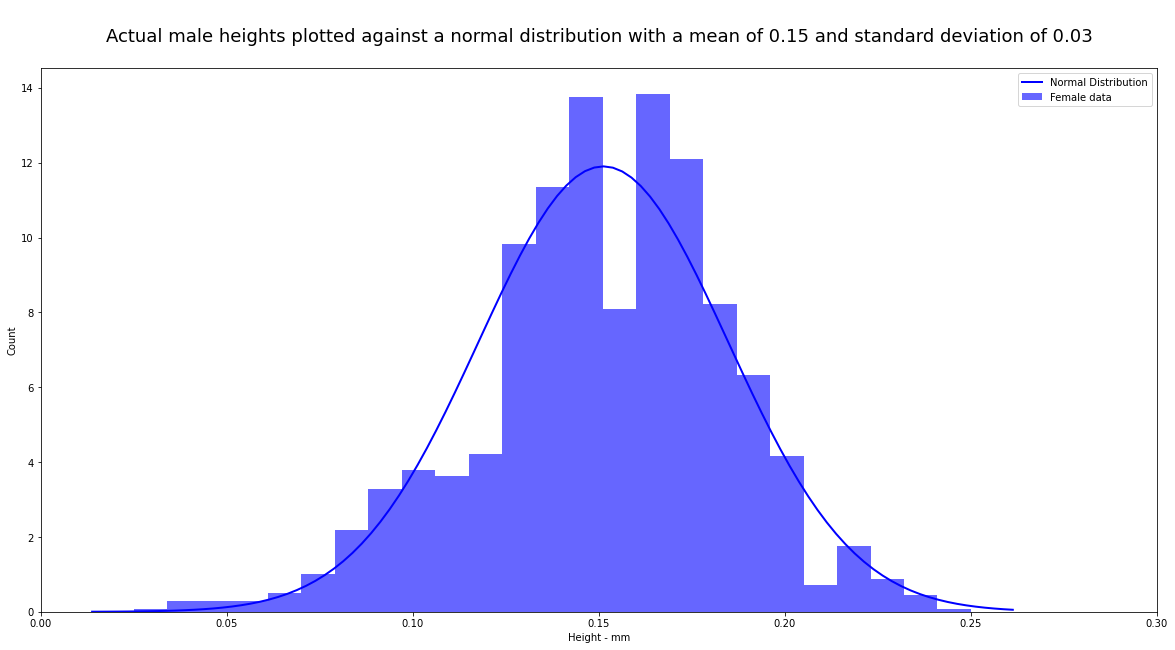

In [21]:
# Visualise the actual male heights versus the normal distribution as a plot

# Fit a normal distribution to the data using mean and standard deviation values
mu, std = norm.fit(dependent[independent == 'M']) 
  
# Plot the histogram.
plt.hist(dependent[independent == 'M'], bins=25, density=True, alpha=0.6, color='b', label = "Female data")
  
# Plot the probability density function (pdf)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.xlim(0.0,0.3)
plt.plot(x, p, 'k', linewidth=2, color = 'b', label = "Normal Distribution")
title = "\nActual male heights plotted against a normal distribution with a mean of {:.2f} and standard deviation of {:.2f}\n".format(mu, std)
plt.title(title, fontsize=18)
plt.xlabel("Height - mm")
plt.ylabel("Count")
plt.legend()
plt.show();

In [22]:
# Run the Shapiro-Wilk test for infant heights
ss.shapiro(dependent[independent == 'I'])

ShapiroResult(statistic=0.9966360330581665, pvalue=0.005396170075982809)

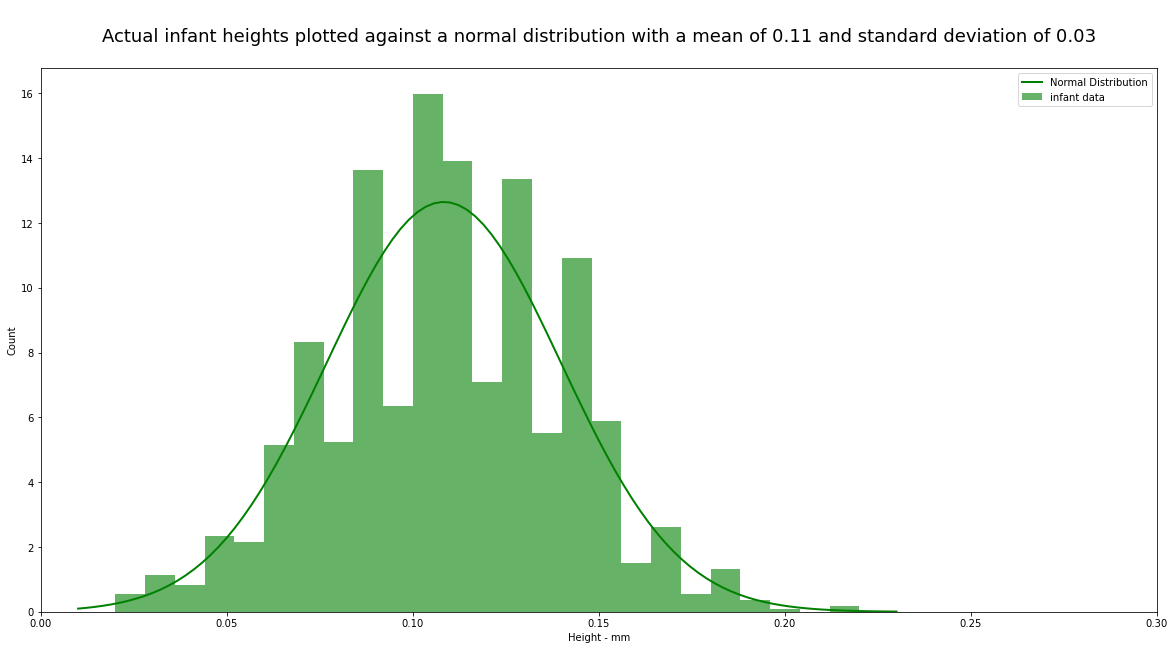

In [23]:
# Plot the actual infant heights versus the normal distribution

# Fit a normal distribution to the data using mean and standard deviation values
mu, std = norm.fit(dependent[independent == 'I']) 
  
# Plot the histogram.
plt.hist(dependent[independent == 'I'], bins=25, density=True, alpha=0.6, color='g', label = "infant data")
  
# Plot the probability density function (pdf)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.xlim(0.0,0.3)
plt.plot(x, p, 'k', linewidth=2, color = 'g', label = "Normal Distribution")
title = ("\nActual infant heights plotted against a normal distribution with a mean of {:.2f} and standard deviation of {:.2f}\n".format(mu, std))
plt.title(title, fontsize=18)
plt.xlabel("Height - mm")
plt.ylabel("Count")
plt.legend()
plt.show();

##### Normality Conclusion:

Generally, the null hypothesis is rejected if the 'p value' is below 0.05.  In all groups above we conclude that our variable (Height) for all 'Sex' classes are not normally distributed.  

<br>

#### Assumption 6: Homogeneity of Variances

***
Run 'levene test' to test for homogeneity. 

The null hypothesis for the Levene test is that group variances are equal. A 'p value' of less than 0.05 indicates that the assumption of homogeneity of variance assumption has been violated.

**variance = (mean - sample) ^ 2**

In [24]:
# Test for equal variances.
ss.levene(
    dependent[independent == 'F'],
    dependent[independent == 'M'],
    dependent[independent == 'I']
)

LeveneResult(statistic=7.368884768104124, pvalue=0.0006388242181736371)

#### Homogeneity Conclusion:
As the p value is less than 0.05, the variances are unequal and the assumption of homogeneity of variances has failed the levene test in all groups i.e. the null hypothesis is rejected

In [25]:
# Compare the means manually
print("The mean of female heights is",round(dependent[independent == 'F'].mean(),3))
print("The mean of male heights is",round(dependent[independent == 'M'].mean(),3))
print("The mean of infant heights is",round(dependent[independent == 'I'].mean(),3))

The mean of female heights is 0.157
The mean of male heights is 0.151
The mean of infant heights is 0.108


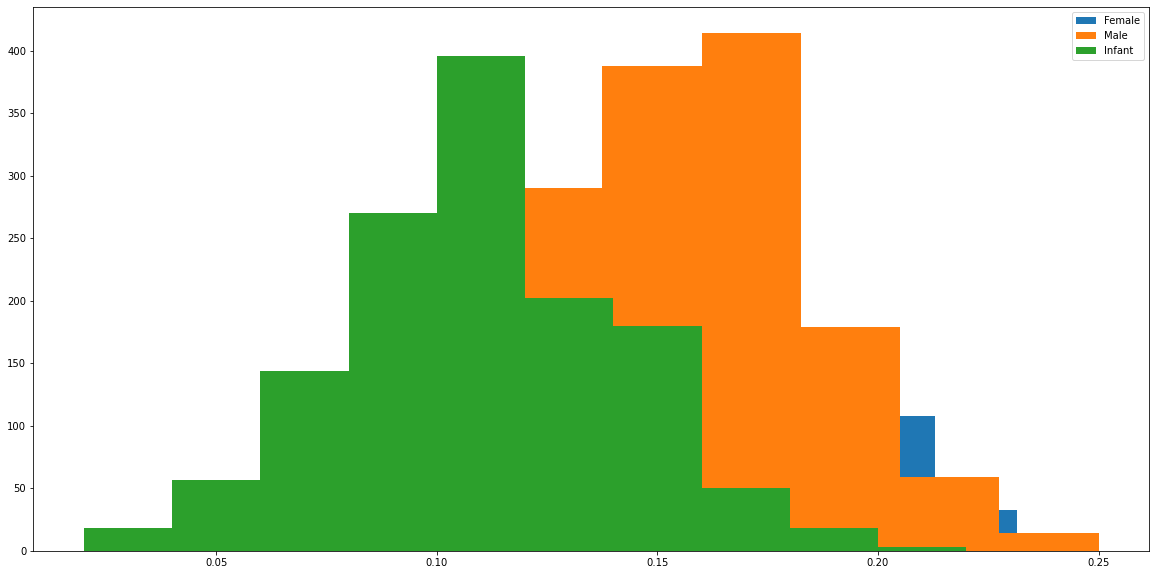

In [26]:
# Plot the variables
plt.hist(dependent[independent == 'F'], label='Female')
plt.hist(dependent[independent == 'M'], label='Male')
plt.hist(dependent[independent == 'I'], label='Infant')
plt.legend()
plt.show()

### One Way Anova
____________

In [27]:
# Run ANOVA f distribution
ss.f_oneway(
    dependent[independent == 'F'],
    dependent[independent == 'M'],
    dependent[independent == 'I']
)

F_onewayResult(statistic=963.4273450749292, pvalue=0.0)

**Conclusion:**
As the p-value is less then 0.5 we can conclude that the mean heights of male, female and infant abalones are different.

### Post Hoc Testing
_______________

The Tukey test runs comparisons in pairs among each of the groups, and uses a conservative error estimate to find the groups which are statistically different from one another.

In [28]:
# Perform TukeyHSD test(Tukey’s Honestly-Significant Difference) - To find how the treatment groups differ from one another
tukey = pairwise_tukeyhsd(endog=df['Height'], groups=df['Sex'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
     F      I  -0.0491 0.001 -0.052 -0.0462   True
     F      M  -0.0062 0.001 -0.009 -0.0034   True
     I      M   0.0429 0.001 0.0401  0.0457   True
--------------------------------------------------


**Interpreting the results of the tukey test** <br/>
- P-value for the difference in means between F and I: 0.001
- P-value for the difference in means between F and M: 0.001
- P-value for the difference in means between I and M:  0.001

Therefore we would conclude that there is a statistically significant difference between the means of all groups

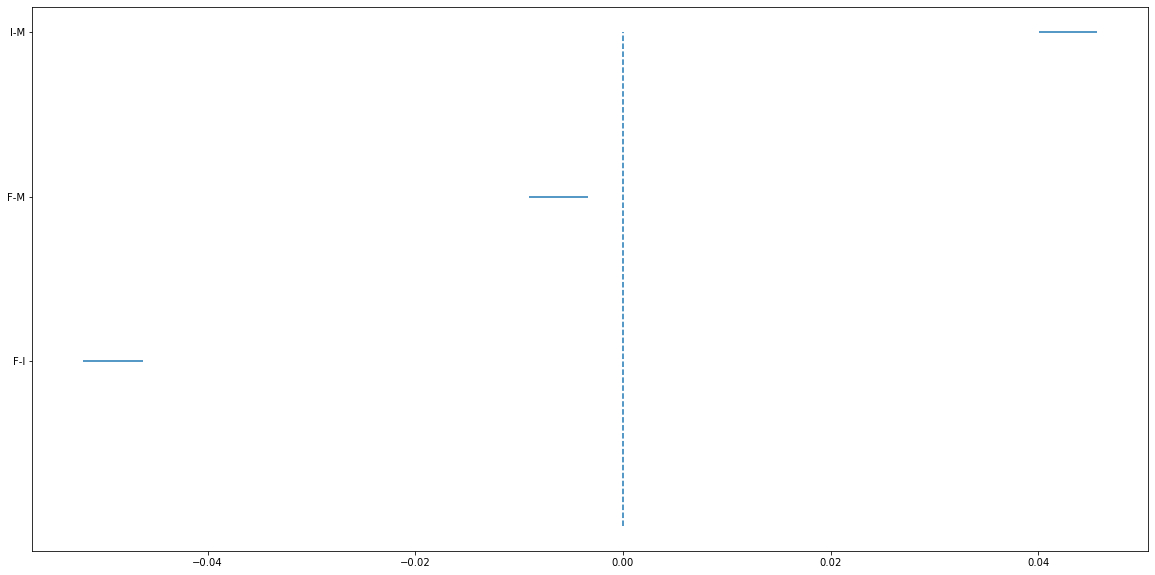

In [29]:
# Visualising the results of the Tukey test
rows = tukey.summary().data[1:]
plt.hlines( range(len(rows)), [row[4] for row in rows], [row[5] for row in rows] )
plt.vlines( 0, -1, len( rows )-1, linestyles='dashed' )
plt.gca().set_yticks( range( len( rows ) ) )
plt.gca().set_yticklabels( [ f'{x[0]}-{x[1]}' for x in rows ] )
plt.show()

Confidence intervals that cross the vertical, dashed line at  are those in which the means across those groups may be equal. Other intervals have mean differences whose 95% confidence intervals do not include zero.  In this case the male/female datasets have the closest means i.e. 0.15 & 0.16

### T-Test
___________
The 'T-score' value generated by the 'T-test' describes the relative difference between the mean (average) values of two arrays. The smaller the value, the more similar the arrays are and vice versa.

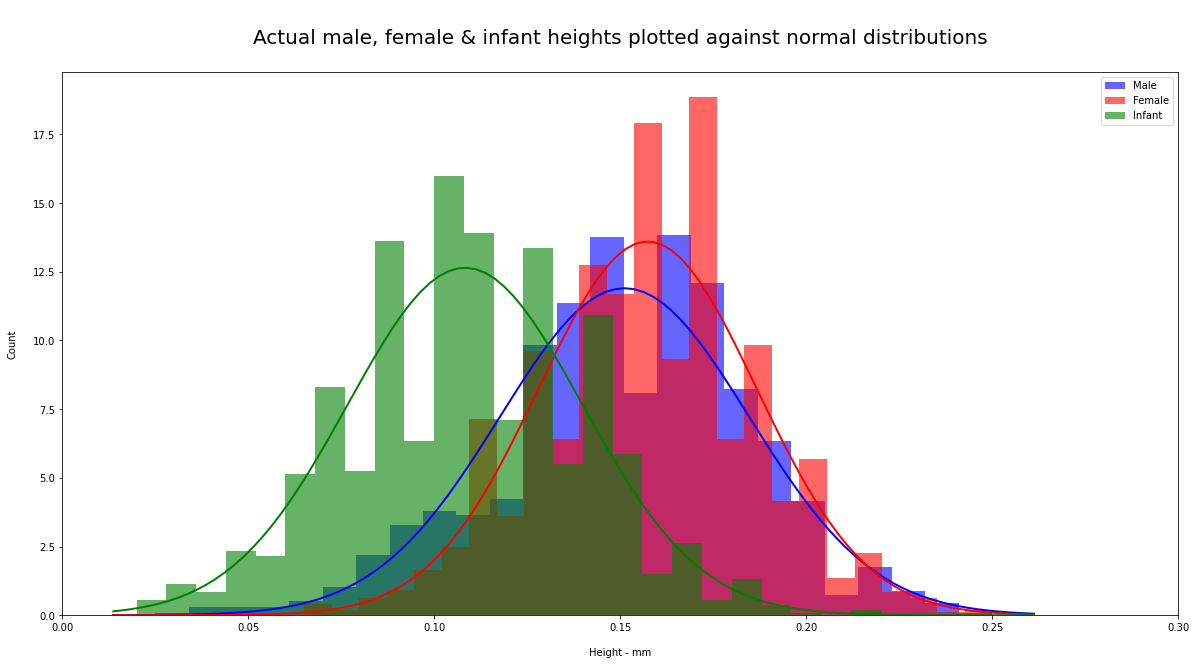

In [30]:
# Visualise the actual heights versus the normal distribution as a plot

# Fit a normal distribution to the data using mean and standard deviation values
mu1, std1 = norm.fit(dependent[independent == 'M']) 
  
# Plot the histogram.
plt.hist(dependent[independent == 'M'], bins=25, density=True, alpha=0.6, color='b', label = "Male")
  
# Plot the probability density function (pdf) of male heights
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu1, std1)
plt.xlim(0.0,0.3)
plt.plot(x, p, 'k', linewidth=2, color = 'b')

# Fit a normal distribution to the data using mean and standard deviation values
mu2, std2 = norm.fit(dependent[independent == 'F']) 
  
# Plot the histogram.
plt.hist(dependent[independent == 'F'], bins=25, density=True, alpha=0.6, color='r', label = "Female")
  
# Plot the probability density function (pdf) of female heights
p = norm.pdf(x, mu2, std2)
plt.xlim(0.0,0.3)
plt.plot(x, p, 'k', linewidth=2, color = 'r')

# Fit a normal distribution to the data using mean and standard deviation values
mu3, std3 = norm.fit(dependent[independent == 'I']) 
  
# Plot the histogram.
plt.hist(dependent[independent == 'I'], bins=25, density=True, alpha=0.6, color='g', label = "Infant")
  
# Plot the probability density function (pdf) of female heights
p = norm.pdf(x, mu3, std3)
plt.xlim(0.0,0.3)
plt.plot(x, p, 'k', linewidth=2, color = 'g')

title = "\nActual male, female & infant heights plotted against normal distributions\n"
plt.title(title, fontsize=20)
plt.xlabel("\nHeight - mm")
plt.ylabel("Count\n")
plt.legend()
plt.show();

In [31]:
# Calculate the independent samples t-statistic for the samples.
stats.ttest_ind(dependent[independent == 'F'],dependent[independent == 'M'])

Ttest_indResult(statistic=5.189752345882658, pvalue=2.25474711804339e-07)

In [32]:
# Run a t-test using Sex and Height as variables in pairs
print(stats.ttest_ind(dependent[independent == 'F'],dependent[independent == 'M']))
print(stats.ttest_ind(dependent[independent == 'F'],dependent[independent == 'I']))
print(stats.ttest_ind(dependent[independent == 'M'],dependent[independent == 'I']))

Ttest_indResult(statistic=5.189752345882658, pvalue=2.25474711804339e-07)
Ttest_indResult(statistic=41.38718174476391, pvalue=5.008089137176424e-289)
Ttest_indResult(statistic=35.098574966435926, pvalue=9.085442810577059e-225)


### Compare results of Height vs Sex to Shell Weight vs Sex 
***

In [33]:
dependent2 = df['Shell_Weight']

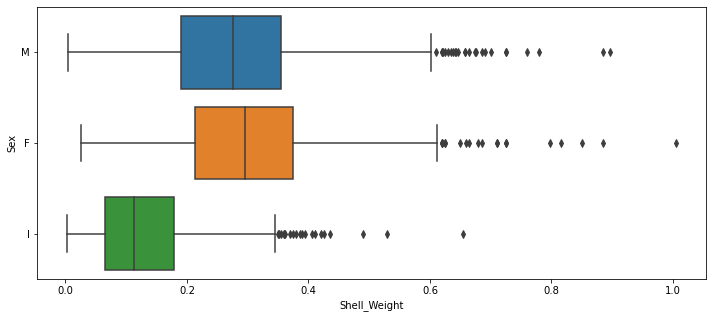

In [34]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=dependent2, y=independent);

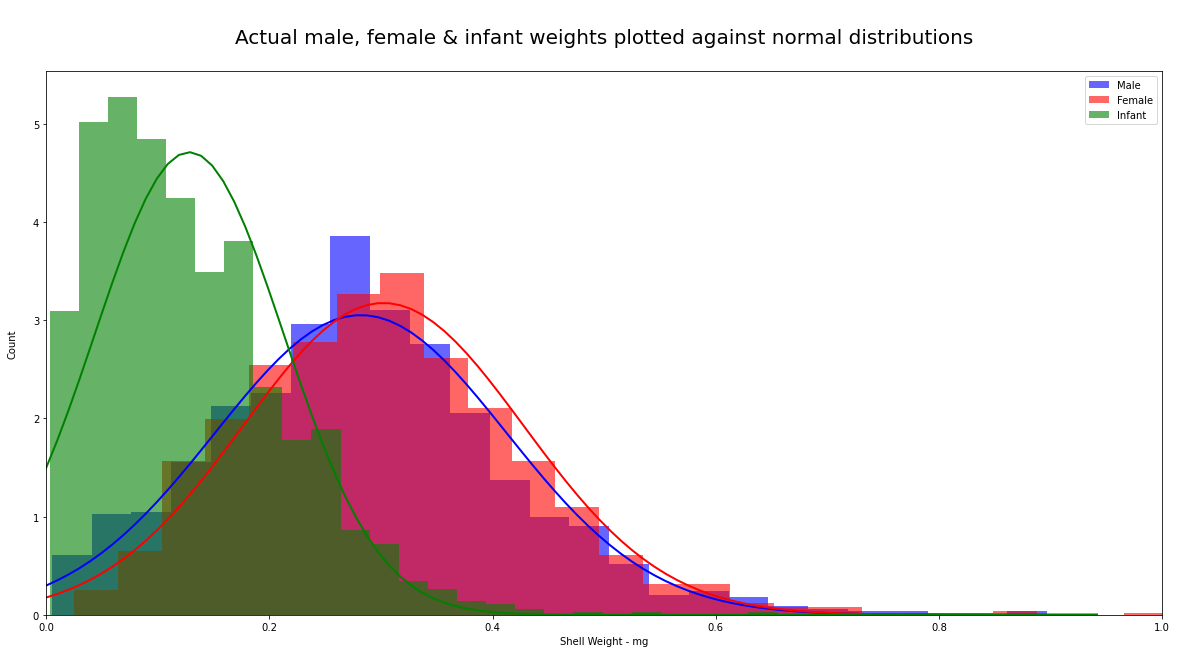

In [35]:
# Visualise the actual shell weights versus the normal distribution as a plot

# Fit a normal distribution to the data using mean and standard deviation values
mu1, std1 = norm.fit(dependent2[independent == 'M']) 
  
# Plot the histogram.
plt.hist(dependent2[independent == 'M'], bins=25, density=True, alpha=0.6, color='b', label = "Male")
  
# Plot the probability density function (pdf) of male heights
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu1, std1)
plt.xlim(0.0,1.0)
plt.plot(x, p, 'k', linewidth=2, color = 'b')

# Fit a normal distribution to the data using mean and standard deviation values
mu2, std2 = norm.fit(dependent2[independent == 'F']) 
  
# Plot the histogram.
plt.hist(dependent2[independent == 'F'], bins=25, density=True, alpha=0.6, color='r', label = "Female")
  
# Plot the probability density function (pdf) of female heights
p = norm.pdf(x, mu2, std2)
plt.xlim(0.0,1.0)
plt.plot(x, p, 'k', linewidth=2, color = 'r')

# Fit a normal distribution to the data using mean and standard deviation values
mu3, std3 = norm.fit(dependent2[independent == 'I']) 
  
# Plot the histogram.
plt.hist(dependent2[independent == 'I'], bins=25, density=True, alpha=0.6, color='g', label = "Infant")
  
# Plot the probability density function (pdf) of female heights
p = norm.pdf(x, mu3, std3)
plt.xlim(0.0,1.0)
plt.plot(x, p, 'k', linewidth=2, color = 'g')

title = "\nActual male, female & infant weights plotted against normal distributions\n"
plt.title(title, fontsize=20)
plt.xlabel("Shell Weight - mg")
plt.ylabel("Count\n")
plt.legend()
plt.show();

In [38]:
# Perform Shapiro Wilk Test
print(ss.shapiro(dependent2[independent == 'M']))
print(ss.shapiro(dependent2[independent == 'F']))
print(ss.shapiro(dependent2[independent == 'I']))

ShapiroResult(statistic=0.9839156866073608, pvalue=5.076504754758515e-12)
ShapiroResult(statistic=0.975107729434967, pvalue=3.2069616059948736e-14)
ShapiroResult(statistic=0.9390125274658203, pvalue=5.158893151490315e-23)


In [45]:
# Perform Levine Test
ss.levene(
    dependent2[independent == 'F'],
    dependent2[independent == 'M'],
    dependent2[independent == 'I']
)

LeveneResult(statistic=91.38898163141529, pvalue=1.4331153204654667e-39)

In [42]:
# Perform ANOVA f distribution
ss.f_oneway(
    dependent2[independent == 'F'],
    dependent2[independent == 'M'],
    dependent2[independent == 'I']
)

F_onewayResult(statistic=904.8881033786435, pvalue=0.0)

In [44]:
# Perform T Test
print(stats.ttest_ind(dependent[independent == 'F'],dependent[independent == 'M']))
print(stats.ttest_ind(dependent[independent == 'F'],dependent[independent == 'I']))
print(stats.ttest_ind(dependent[independent == 'M'],dependent[independent == 'I']))

Ttest_indResult(statistic=5.189752345882658, pvalue=2.25474711804339e-07)
Ttest_indResult(statistic=41.38718174476391, pvalue=5.008089137176424e-289)
Ttest_indResult(statistic=35.098574966435926, pvalue=9.085442810577059e-225)


In [39]:
# Perform TukeyHSD test(Tukey’s Honestly-Significant Difference)
tukey = pairwise_tukeyhsd(endog=df['Shell_Weight'], groups=df['Sex'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     F      I  -0.1739 0.001 -0.1845 -0.1633   True
     F      M  -0.0202 0.001 -0.0305   -0.01   True
     I      M   0.1537 0.001  0.1435  0.1639   True
---------------------------------------------------


#### Conclusion
The shell weight is less close to a normal distribution than height 

#### References:

[1] https://docs.scipy.org/doc/scipy/reference/stats.html

[2] https://www.tutorialspoint.com/scipy/scipy_stats.htm

[3] http://specminor.org/2017/01/11/python-descriptive-statistics-scipy.html#:~:text=The%20statistics%20library%20par%20excellence%20for%20Python%20is,bunch%20of%20descriptive%20statistics%20at%20once%2C%20scipy.stats.describe%20%28%29%3A

[4] https://programming-review.com/python/scipy-examples#:~:text=Statsmodels%20has%20scipy.stats%20as%20a%20dependency.%20Scipy.stats%20has,it%20works%20with%20pandas%20out%20of%20the%20box

[5] https://docs.scipy.org/doc/scipy/reference/stats.html

[6] https://data-flair.training/blogs/scipy-statistical-functions/#:~:text=The%20scipy.stats%20is%20the%20SciPy%20sub-package.%20It%20is,functionality%20is%20expanding%20as%20the%20library%20is%20open-source.

[7] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html

[8] https://www.bing.com/search?q=cdf+method&cvid=c65ee34bfef34d37ba0399662d25bbbe&aqs=edge.0.0j69i57j0l3.2763j0j1&pglt=163&FORM=ANNTA1&PC=U531

[9] https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/basic-statistics/probability-distributions/how-to/cumulative-distribution-function-cdf/methods-and-formulas/methods-and-formulas/#:~:text=%20Methods%20and%20formulas%20for%20Cumulative%20Distribution%20Function,a%20standard%20normal%20distribution%2C%20X%202...%20More%20

[10] https://integratedmlai.com/normal-distribution-an-introductory-guide-to-pdf-and-cdf/#:~:text=The%20probability%20density%20function%20%28PDF%29%20is%20a%20statistical,the%20interval%20in%20which%20the%20variable%20will%20fall.

[11] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

[12] https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php

[13] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

[14] https://www.spss-tutorials.com/spss-shapiro-wilk-test-for-normality/

[15] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

[16] https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php

[17] https://seaborn.pydata.org/generated/seaborn.boxplot.html

[18] https://splendidwritings.com/testing-assumptions-the-shapiro-wilk-test-and-the-levene-test/

[19] https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/

[20] https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

[21] https://www.scribbr.com/statistics/one-way-anova/

[22] https://nathancarter.github.io/how2data/site/how-to-perform-post-hoc-analysis-with-tukey-s-hsd-test-in-python-using-statsmodels-matplotlib-and-scikit/

[23] https://www.statology.org/tukey-test-python/

[24] https://towardsdatascience.com/anova-test-with-python-cfbf4013328b

[26] https://github.com/ianmcloughlin/jupyter-teaching-notebooks